# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [118]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# print(cities)
len(cities)

593

In [51]:
city_list = cities
city_list

['atuona',
 'makrikapa',
 'vaini',
 'punta arenas',
 'ribeira grande',
 'kruisfontein',
 'ushuaia',
 'albany',
 'solnechnyy',
 'sabzevar',
 'ilulissat',
 'girona',
 'saint-joseph',
 'dodola',
 'puerto leguizamo',
 'iqaluit',
 'avera',
 'severo-kurilsk',
 'sur',
 'cherskiy',
 'half moon bay',
 'abu zabad',
 'rikitea',
 'kaitangata',
 'ponta do sol',
 'seoul',
 'sorland',
 'torbay',
 'avarua',
 'dikson',
 'hobart',
 'busselton',
 'saint george',
 'srednekolymsk',
 'sinnamary',
 'port elizabeth',
 'saskylakh',
 'karkaralinsk',
 'barrow',
 'kulunda',
 'yellowknife',
 'beringovskiy',
 'east london',
 'shenjiamen',
 'olinda',
 'caravelas',
 'belushya guba',
 'barentsburg',
 'coahuayana',
 'cordoba',
 'bredasdorp',
 'bowen',
 'taolanaro',
 'walvis bay',
 'cedar city',
 'kieta',
 'tuktoyaktuk',
 'beberibe',
 'aurangabad',
 'vila velha',
 'new norfolk',
 'hilo',
 'yomitan',
 'lisala',
 'kitimat',
 'tigil',
 'chuy',
 'mar del plata',
 'saint-philippe',
 'vanavara',
 'aras',
 'plouzane',
 'taoude

In [71]:
df = pd.DataFrame(city_list)
df["City"]=cities
df = df.drop([1])
df

,0,City
0,atuona,atuona
2,vaini,vaini
3,punta arenas,punta arenas
4,ribeira grande,ribeira grande
5,kruisfontein,kruisfontein
...,...,...
638,masallatah,masallatah
639,cap-aux-meules,cap-aux-meules
640,muzhi,muzhi
641,cayenne,cayenne


In [72]:
city_short_df = df.head(10)
city_short_df 

,0,City
0,atuona,atuona
2,vaini,vaini
3,punta arenas,punta arenas
4,ribeira grande,ribeira grande
5,kruisfontein,kruisfontein
6,ushuaia,ushuaia
7,albany,albany
8,solnechnyy,solnechnyy
9,sabzevar,sabzevar
10,ilulissat,ilulissat


In [73]:
# Creating small set to execute loops
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"


# lat = []
# lng = []
# temps = []
# humidity = []
# cloudiness = []
# windspeed = []


# # looping through test cities:
# # for index, row in city_short_df.iterrows():
# for index, row in city_short_df.iterrows():
#     city = row["City"]
#     weather_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
#     response = requests.get(weather_url).json()

    
#     try:
        
#         city_short_df.loc[index, "Lng"] = lng.append(response["coord"]["lon"])
#         city_short_df.loc[index, "Temp"] = temps.append(response["main"]["temp_max"])
#         city_short_df.loc[index, "Humidity"] = humidity.append(response["main"]["humidity"])
#         city_short_df.loc[index, "Cloudiness"] = cloudiness.append(response["clouds"]["all"])
#         city_short_df.loc[index, "WindSpeed"] = windspeed.append(response["wind"]["speed"])
#         city_short_df.loc[index, "Lat"] = lat.append(response["coord"]["lat"])
#         print(f"processing {index}| {city}")
        
#     except KeyError:
#         print("skipping {city}")


/Users/Tyson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Tyson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


processing 0| atuona
processing 2| vaini
processing 3| punta arenas
processing 4| ribeira grande
processing 5| kruisfontein
processing 6| ushuaia
processing 7| albany
processing 8| solnechnyy
processing 9| sabzevar
processing 10| ilulissat


In [74]:
# print(lat)
# print(lng)
# print(temps)
# print(humidity)
# print(cloudiness)

[-9.8, -21.2, -53.15, 38.52, -34, -54.8, 42.6, 50.72, 36.21, 69.22]
[-139.03, -175.2, -70.92, -28.7, 24.73, -68.3, -73.97, 136.63, 57.68, -51.1]
[78.4, 77, 44.6, 61.41, 70, 48.2, 34, 29.32, 60.8, 35.6]
[79, 83, 93, 66, 83, 57, 78, 83, 25, 74]
[16, 75, 90, 52, 100, 75, 11, 36, 0, 100]


In [77]:
# # Creating small dataframe to test
# citieslis = {"Lat": [lat], "Lng": [lng], "Temp": [temps],
#              "Humidity": [humidity], "Cloudiness":[cloudiness],
#              "windSpeed": [windspeed]}
# city_short_df["Lat"] = lat
# city_short_df["Lng"] = lng
# city_short_df["Temps"] = temps
# city_short_df["Humidity"] = humidity
# city_short_df["Cloudiness"] = cloudiness
# city_short_df["WindSpeed"] = windspeed
# city_short_df

In [88]:
# actual data set
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


lat = []
lng = []
temps = []
humidity = []
cloudiness = []
windspeed = []


# looping through test cities:
# for index, row in city_short_df.iterrows():
for index, row in df.iterrows():
    city = row["City"]
    weather_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(weather_url).json()

    
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temps.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        
        print(f"processing {index}| {city}")
        
    except KeyError:
        print("skipping {city}")
        df.drop(index, inplace=True)


processing 0| atuona
processing 2| vaini
processing 3| punta arenas
processing 4| ribeira grande
processing 5| kruisfontein
processing 6| ushuaia
processing 7| albany
processing 8| solnechnyy
processing 9| sabzevar
processing 10| ilulissat
processing 11| girona
processing 12| saint-joseph
processing 13| dodola
processing 14| puerto leguizamo
processing 15| iqaluit
processing 16| avera
processing 17| severo-kurilsk
processing 18| sur
processing 19| cherskiy
processing 20| half moon bay
processing 21| abu zabad
processing 22| rikitea
processing 23| kaitangata
processing 24| ponta do sol
processing 25| seoul
processing 26| sorland
processing 27| torbay
processing 28| avarua
processing 29| dikson
processing 30| hobart
processing 31| busselton
processing 32| saint george
processing 33| srednekolymsk
processing 34| sinnamary
processing 35| port elizabeth
processing 36| saskylakh
processing 38| barrow
processing 39| kulunda
processing 40| yellowknife
processing 41| beringovskiy
processing 42|

processing 358| pyshchug
processing 359| konstantinovka
processing 360| dalbandin
processing 361| pangnirtung
processing 362| khorinsk
processing 363| marienburg
processing 364| biltine
processing 365| bani walid
processing 366| samarai
processing 367| saint-augustin
processing 368| souillac
processing 369| liusha
processing 370| tevaitoa
processing 371| lipari
processing 372| bambous virieux
processing 373| gouyave
processing 374| qaqortoq
processing 375| khatanga
processing 376| imbituba
processing 377| saint-francois
processing 378| isangel
processing 379| temir
processing 380| kuala pilah
processing 381| anderson
processing 382| nioro
processing 383| san vicente
processing 384| nalut
processing 385| uige
processing 387| bengkulu
processing 388| coquimbo
processing 389| sitka
processing 390| sabha
processing 391| bubaque
processing 392| vardo
processing 393| marzuq
processing 394| grand forks
processing 395| tashtyp
processing 396| lindi
processing 398| leh
processing 399| omsukchan

In [90]:
df.columns

Index([0, 'City', 'Lng', 'Temp', 'Humidity', 'Cloudiness', 'WindSpeed', 'Lat',
       'Temps'],
      dtype='object')

In [94]:
# Creating small dataframe to test
citieslis = {"Lat": [lat], "Lng": [lng], "Temp": [temps],
             "Humidity": [humidity], "Cloudiness":[cloudiness],
             "windSpeed": [windspeed]}
df["Lat"] = lat
df["Lng"] = lng
df["Temps"] = temps
df["Humidity"] = humidity
df["Cloudiness"] = cloudiness
df["WindSpeed"] = windspeed
# city_short_df
df
cities_df = df[['City', 'Lat', 'Lng', 'Humidity', 'Cloudiness', 'WindSpeed','Temps']
cities_df

,City,Lat,Lng,Humidity,Cloudiness,WindSpeed,Temps
0,atuona,-9.80,-139.03,75,3,21.54,78.94
2,vaini,-21.20,-175.20,74,20,12.75,80.60
3,punta arenas,-53.15,-70.92,81,90,9.17,48.20
4,ribeira grande,38.52,-28.70,68,42,21.23,61.48
5,kruisfontein,-34.00,24.73,83,100,7.00,68.00
...,...,...,...,...,...,...,...
638,masallatah,32.62,14.00,63,33,9.51,66.06
639,cap-aux-meules,47.38,-61.86,40,0,14.99,33.80
640,muzhi,65.37,64.67,86,39,17.60,35.58
641,cayenne,4.93,-52.33,100,90,3.36,77.00


In [96]:
# temps = cities_df["Max Temp"]
humidity = cities_df["Humidity"]
cloudiness = cities_df["Cloudiness"]
lat = cities_df["Lat"]
windspeed = cities_df["WindSpeed"]

print(humidity)

0       75
2       74
3       81
4       68
5       83
      ... 
638     63
639     40
640     86
641    100
642     30
Name: Humidity, Length: 591, dtype: int64


As the latitude reaches the Equator, the tempurature gets warmer


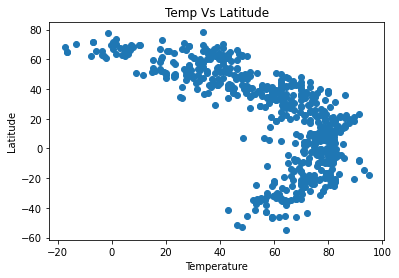

In [136]:
plt.scatter(temps, lat)
plt.title("Temp Vs Latitude")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.savefig("output_data/templat.png")

print("As the latitude reaches the Equator, the tempurature gets warmer")

As one gets closer to the equator, the more humidity there is


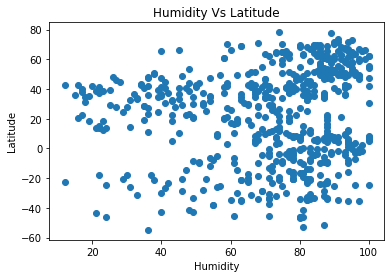

In [137]:
plt.scatter(humidity, lat)
plt.title("Humidity Vs Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("output_data/humiditylat.png")
print("As one gets closer to the equator, the more humidity there is")

Text(21.875, 0.5, 'Latitude')

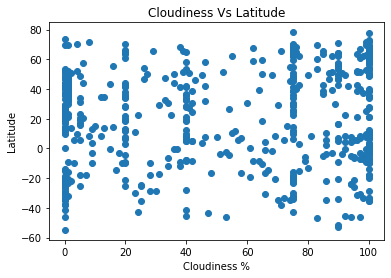

In [138]:
plt.scatter(cloudiness, lat)
plt.savefig("output_data/cloudlat.png")
plt.title("Cloudiness Vs Latitude")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")

Text(21.875, 0.5, 'Latitude')

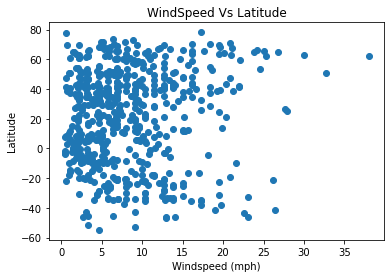

In [139]:
plt.scatter(windspeed, lat)
plt.savefig("output_data/windLat.png")
plt.title("WindSpeed Vs Latitude")
plt.xlabel("Windspeed (mph)")
plt.ylabel("Latitude")

In [106]:
north_df = cities_df.loc[cities_df["Lat"] >0,:]
# north_df
south_df = cities_df.loc[cities_df["Lat"] <0,:]
south_df

,City,Lat,Lng,Humidity,Cloudiness,WindSpeed,Temps
0,atuona,-9.80,-139.03,75,3,21.54,78.94
2,vaini,-21.20,-175.20,74,20,12.75,80.60
3,punta arenas,-53.15,-70.92,81,90,9.17,48.20
5,kruisfontein,-34.00,24.73,83,100,7.00,68.00
6,ushuaia,-54.80,-68.30,36,0,4.70,64.40
...,...,...,...,...,...,...,...
628,mancio lima,-7.61,-72.90,55,40,3.36,91.40
630,nosy varika,-20.58,48.53,82,69,7.90,72.63
632,ongandjera,-17.88,15.07,22,7,11.27,74.71
635,maldonado,-34.67,-54.92,63,0,17.22,62.60


In [109]:
# North Data
n_temps = north_df["Temps"]
n_humidity = north_df["Humidity"]
n_cloudiness = north_df["Cloudiness"]
n_windspeed = north_df["WindSpeed"]
n_lat = north_df["Lat"]

# South Data
s_temps = south_df["Temps"]
s_humidity = south_df["Humidity"]
s_cloudiness = south_df["Cloudiness"]
s_windspeed = south_df["WindSpeed"]
s_lat = south_df["Lat"]

As we approach the equator from the north, the temperature gets warmer, reaching above 80 degrees


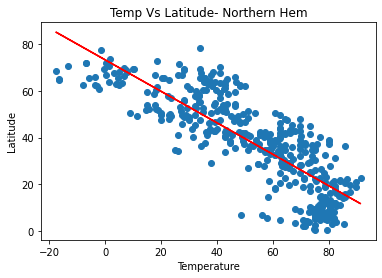

In [148]:
# Temperature (F) vs. Latitude
# Northern Hem
x_values = north_df["Temps"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_temps, n_lat)
plt.plot(x_values,regress_values,"r-")
plt.savefig("output_data/tempLat_North.png")
plt.title("Temp Vs Latitude- Northern Hem")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
print("As we approach the equator from the north, the temperature gets warmer, reaching above 80 degrees")

As we approach the equator from the south, the temperature gets warmer, reaching above 95 degrees


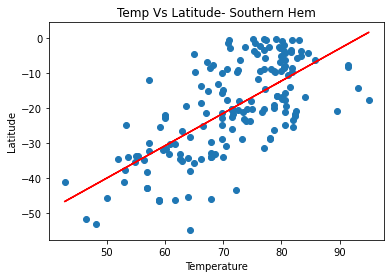

In [149]:
# # Southern Hem
x_values = south_df["Temps"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_temps, s_lat)
plt.savefig("output_data/tempLat_South.png")
plt.title("Temp Vs Latitude- Southern Hem")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
print("As we approach the equator from the south, the temperature gets warmer, reaching above 95 degrees")

Humidity doesn't appear to have a relationship as we approach the equator, rather depends on where we are in longitude


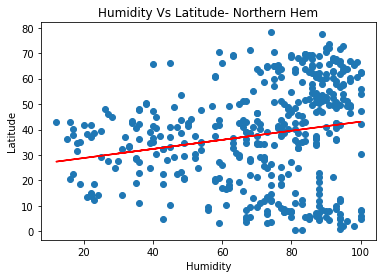

In [152]:
# Humidity vs. Latitude
# Northern Hem
x_values = north_df["Humidity"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_humidity, n_lat)
plt.plot(x_values,regress_values,"r-")
plt.savefig("output_data/humidLat_North.png")
plt.title("Humidity Vs Latitude- Northern Hem")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
print("Humidity doesn't appear to have a relationship as we approach the equator, rather depends on where we are in longitude")

As we approach the equator from the south, there is a significant amount of humidity, grouping around 70-90%


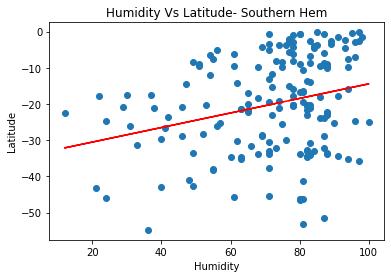

In [154]:
# # Southern Hem
x_values = south_df["Humidity"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_humidity, s_lat)
plt.plot(x_values,regress_values,"r-")
plt.savefig("output_data/humidLat_South.png")
plt.title("Humidity Vs Latitude- Southern Hem")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
print("As we approach the equator from the south, there is a significant amount of humidity, grouping around 70-90%")

 There doesn't appear to be a relationship with Cloudiness and Latitude, rather the cloudiness is based on which Longitude it sits at


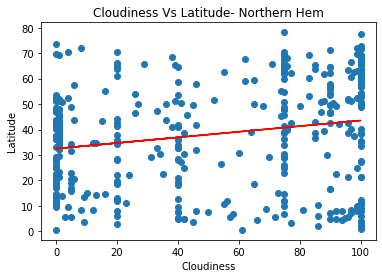

In [155]:
# Cloudiness vs. Latitude
# Northern Hem
x_values = north_df["Cloudiness"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_cloudiness, n_lat)
plt.plot(x_values,regress_values,"r-")
plt.savefig("output_data/cloudLat_North.png")
plt.title("Cloudiness Vs Latitude- Northern Hem")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
print(" There doesn't appear to be a relationship with Cloudiness and Latitude, rather the cloudiness is based on which Longitude it sits at")

As we near the equator, there is no relationship with latitude, but rather the longitude the city is


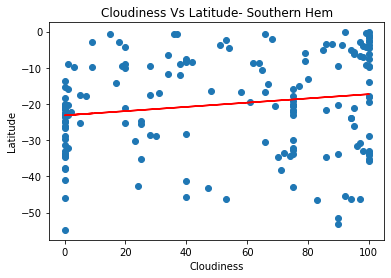

In [157]:
# # Southern Hem
x_values = south_df["Cloudiness"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_cloudiness, s_lat)
plt.plot(x_values,regress_values,"r-")
plt.savefig("output_data/cloudLat_South.png")
plt.title("Cloudiness Vs Latitude- Southern Hem")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
print("As we near the equator, there is no relationship with latitude, but rather the longitude the city is")

Outside of the outlier, there is a light breeze between 0-10 mph as we approach the equator


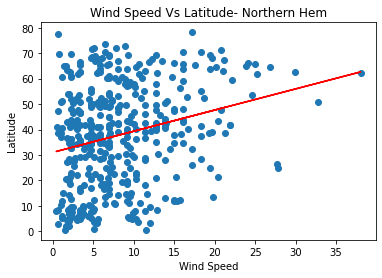

In [158]:
# Wind Speed vs. Latitude
# Northern Hem
x_values = north_df["WindSpeed"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_windspeed, n_lat)
plt.plot(x_values,regress_values,"r-")
plt.savefig("output_data/windspeedLat_North.png")
plt.title("Wind Speed Vs Latitude- Northern Hem")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
print("Outside of the outlier, there is a light breeze between 0-10 mph as we approach the equator")

In [147]:
# Saving Data files
cities_df.to_csv("output_data/cities.csv", index=False, header=True)
north_df.to_csv("output_data/north_lat.csv", index=False, header=True)
south_df.to_csv("output_data/south_lat.csv", index=False, header=True)